<a href="https://colab.research.google.com/github/wyz1122808/digitRecognition/blob/main/Digit_Recognization_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.callbacks import EarlyStopping

# Load data

In [2]:
!gdown https://drive.google.com/uc?id=1SXCGAzKAKG8RMTe_TSmESdyEFxiUx6d- -O ./test.csv
!gdown https://drive.google.com/uc?id=1zDelOAtkwghIf-5eNX5XerEGp2viEY60 -O ./train.csv

Downloading...
From: https://drive.google.com/uc?id=1SXCGAzKAKG8RMTe_TSmESdyEFxiUx6d-
To: /content/test.csv
100% 51.1M/51.1M [00:00<00:00, 56.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zDelOAtkwghIf-5eNX5XerEGp2viEY60
To: /content/train.csv
100% 76.8M/76.8M [00:00<00:00, 81.8MB/s]


# Get shaoe of the dataset

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')


test_shape = np.shape(test)
train_shape = np.shape(train)

print(f'Shape of Test Data : {test_shape}')
print(f'Shape of Train Data : {train_shape}')

img_size = (28,28,1)

Shape of Test Data : (28000, 784)
Shape of Train Data : (42000, 785)


# Get unique classes & the count

 Labels and their count :
 {1: 4684, 7: 4401, 3: 4351, 9: 4188, 2: 4177, 6: 4137, 0: 4132, 4: 4072, 8: 4063, 5: 3795}


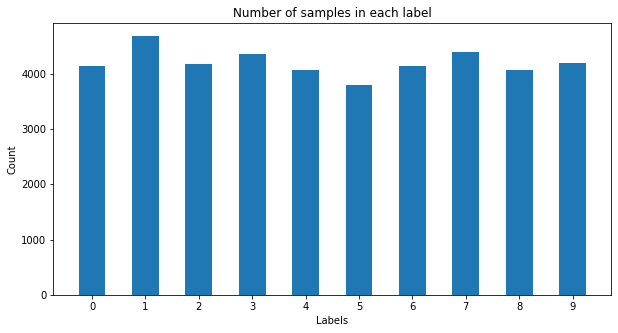

In [4]:
label_count = dict(train.label.value_counts())
print(f' Labels and their count :\n {label_count}')

x = list(label_count.keys())
y = list(label_count.values())

fig = plt.figure(figsize = (10,5))
plt.bar(x, y, width = 0.5)
plt.xticks(x)
plt.title('Number of samples in each label')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

# Preprocessing


In [5]:
train_images = []

for i in range(train_shape[0]):
    data = train.iloc[i,1:]
    data = np.array(data)
    data = np.reshape(data,img_size)
    train_images.append(data)
    
train_images = np.array(train_images)




In [6]:
test_images = []

for i in range(test_shape[0]):
    data = test.iloc[i,:]
    data = np.array(data)
    data = np.reshape(data,img_size)
    test_images.append(data)

test_images = np.array(test_images)

In [7]:
train_labels = list(train.iloc[:,0])
train_labels = np.array(train_labels)
train_labels = np.reshape(train_labels,(train_shape[0],1))

In [8]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=10)
val_images, val_labels = train_images[:8400], train_labels[:8400]

# AlexNet Model

In [9]:
Model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

early_stopping = EarlyStopping(min_delta = 0.001,patience = 20,restore_best_weights = True,verbose = 0)

# Compile
Model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

# Train
hist = Model.fit(train_images, train_labels, batch_size = 256, epochs = 50,callbacks = [early_stopping],validation_data=(val_images, val_labels))

Model.summary()

Epoch 1/50
165/165 [==============================] - 18s 16ms/step - loss: 1.2759 - accuracy: 0.5748 - val_loss: 0.2734 - val_accuracy: 0.9414
Epoch 2/50
165/165 [==============================] - 2s 12ms/step - loss: 0.2003 - accuracy: 0.9554 - val_loss: 0.1054 - val_accuracy: 0.9782
Epoch 3/50
165/165 [==============================] - 2s 12ms/step - loss: 0.1629 - accuracy: 0.9649 - val_loss: 0.0759 - val_accuracy: 0.9864
Epoch 4/50
165/165 [==============================] - 2s 12ms/step - loss: 0.1074 - accuracy: 0.9772 - val_loss: 0.1252 - val_accuracy: 0.9770
Epoch 5/50
165/165 [==============================] - 2s 11ms/step - loss: 0.0816 - accuracy: 0.9830 - val_loss: 0.1332 - val_accuracy: 0.9785
Epoch 6/50
165/165 [==============================] - 2s 12ms/step - loss: 0.0773 - accuracy: 0.9839 - val_loss: 0.0464 - val_accuracy: 0.9892
Epoch 7/50
165/165 [==============================] - 2s 11ms/step - loss: 0.0599 - accuracy: 0.9879 - val_loss: 0.0793 - val_accuracy: 0.983

In [10]:
predictions = Model.predict(test_images)
predictions = np.argmax(predictions,axis=1)

875/875 [==============================] - 3s 3ms/step


# Predicted image


Text(0.5, 1.0, 'Digit : 3')

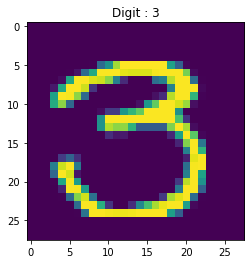

In [11]:
n = np.random.randint(0,test_shape[0]) # Generating Random Number
sample = test.iloc[n,:]
sample = np.array(sample)
sample = np.reshape(sample,img_size)

plt.imshow(sample)
plt.title('Digit : ' + str(predictions[n]))

# Result

In [12]:
results = []

for i in range(len(predictions)):
    results.append([i+1,predictions[i]])
    
results = pd.DataFrame(results, columns = ['ImageId','Label'], index = None)
results = results.set_index('ImageId')
results

,Label
ImageId,
1,2
2,0
3,9
4,0
5,3
...,...
27996,9
27997,7
27998,3
